# Week 6 - Discovering Patterns: Clusters & Topics

By Chu Zhuang

In [1]:
#Special module written for this class
#This provides access to data and to helper functions from previous weeks
#Make sure you update it before starting this notebook
import lucem_illud_2020 #pip install -U git+git://github.com/Computational-Content-Analysis-2020/lucem_illud_2020.git


#All these packages need to be installed from pip
#These are all for the cluster detection
import sklearn
import sklearn.feature_extraction.text
import sklearn.pipeline
import sklearn.preprocessing
import sklearn.datasets
import sklearn.cluster
import sklearn.decomposition
import sklearn.metrics

import scipy #For hierarchical clustering and some visuals
#import scipy.cluster.hierarchy
import gensim#For topic modeling
import requests #For downloading our datasets
import numpy as np #for arrays
import pandas #gives us DataFrames
import pandas as pd
import matplotlib.pyplot as plt #For graphics
import matplotlib.cm #Still for graphics
import seaborn as sns #Makes the graphics look nicer

#This 'magic' command makes the plots work better
#in the notebook, don't use it outside of a notebook.
#Also you can ignore the warning, it
%matplotlib inline

import itertools
import json

## <span style="color:red">*Pitch Your Project*</span>

<span style="color:red">In the three cells immediately following, describe **WHAT** you are planning to analyze for your final project (i.e., texts, contexts and the social game, world and actors you intend to learn about through your analysis) (<200 words), **WHY** you are going to do it (i.e., why would theory and/or the average person benefit from knowing the results of your investigation) (<200 words), and **HOW** you plan to investigate it (i.e., what are the approaches and operations you plan to perform, in sequence, to yield this insight) (<400 words).


# ***What?*** 

For our final project (working with Sruti kanthan), we will analyze interpersonal conversation corpus from the Thank you Because project run by Xuan Zhao, Postdoc at Center for Decision Research, UChicago Booth. In the‘Thank you because’ project, Xuan proposed a new conversation technique-‘thank you because’, *which encourages people who have different perspectives to identify and acknowledge what they value or appreciate about hearing another’s point of view.* The main objective of this study is to examine the efficacy of this technique in communication about disagreement, whether expressing appreciation and affirmation could help people better understand each other's perspectives and facilitate agreement by behavior study.

In the behavior study, two main conditions are designed: 1) ‘Thank you Because’ (named as ‘TYB’), one speaker (Person A) instructed to respond with gratitude and understanding towards Person B’s statement (e.g., “Thank you for sharing your opinion, because I think”) ; 
2) No because (‘NB’), conversely, the speaker (Person A) was told to respond to another by negating their opinions and poking holes in their argument. Subjective reports are measured at the end of each conversation (regarding 1) perceived common ground, 2) sense of feeling heard and 3) interpersonal relationship) to investigate the effect of ‘Thank you Because’--showing gratitude and understanding when discussing difference. 

For Content Analysis of this project,based on the transcriptions collected during these in-field behavior experiments, we aimed to examine the effectiveness of ‘Thank you because’ technique in communication about disagreement from the fine-grained linguistic level. We planned to examine 1) how linguistic features related with appreciation and affirmation, and other features broadly related with communication (for example, hedging, hesitation, positive or negative words), are varied in the Thank you because and No because technique conditions, and 2) how these linguistic features are associated with subjective measures of communication in each condition (perceived common ground, sense of feeling heard etc.); 3) at last if it is promising , we aim to predict communication outcome by these linguistic features based on machine learning and statistic modeling techniques. 


## ***Why?***

Previous research has demonstrated that engaging with diverse viewpoints can create numerous benefits, including forming more accurate beliefs, creating better team performance. However, people often struggle to handle contradicting viewpoints constructively, which often leads to either argumentation and escalated conflicts, or disengagement and avoidance (Gerber, Huber, Doherty, & Dowling, 2012) and prevent people from reaping the benefits of diverse viewpoints and even threaten the prosperity of organizations and our society. 

To help people overcome such impulsive reactions, recent teaching in active listening has advocated for the practice of repeating the other person’s opinion using one’s own words to ensure accurate understanding before expressing one’s own argument. While intuitive and promising, the efficacy of this technique has received little empirical support. In light of this gap in the research, Xuan Zhao and colleagues developed a novel conversation technique—the “Thank You, Because…” approach, in hope of facilitating open conversation and creating an inclusive environment, where people feel valued and appreciated. Based on preliminary experiment results, compared to a “No, Because” approach, where participants poked holes in one another’s arguments, participants using the “Thank You, Because” approach self-reported perceiving the conversations to be more collaborative, feeling more heard and valued, hearing the other better, and perceiving more common ground after the conversations.

To further validate this finding, we hope to examine the efficacy of ‘Thank you because’ technique from the fine-grained linguistic level and innovatively support behavior results with quantitative text-mining techniques which has been seldom applied in behavior conversation studies. 

## ***How?***

We want to examine the effectiveness of the ‘Thank you because’ technique in facilitating mutual understanding and agreement at the granular (linguistic) level. In order to do this, we will first scope out linguistic features associated with expression of appreciation (e.g., ‘thank you’, ‘appreciate’) and affirmation (e.g., ‘yeah’, ‘I agree’, etc,). We will concurrently consider broad linguistic features* (such as hedging and hesitation) to further test the following questions:

1) How do linguistic features and communication patterns vary between the ‘Thank you because’ and ‘No because’ conditions? *Here, we will describe the different distributions of linguistic features extracted above in these two conditions, and then use these distributions to calculate distance scores (e.g. KS or JS distance) for each condition. Then, we will run statistical analyses on the distance scores for each pair to further understand how the linguistic outcomes differ (by condition).

2) How do these linguistic feature differences, by condition, relate with subjective measures of communication about disagreement? To answer this question, we will develop a linear regression model to inspect the linguistic features (predictors) of significant contribution to the prediction of subjective measures after conversation (perceived common ground, etc).

3) Could these linguistic features predict the outcome of the conversation about disagreement? For this part, based on those significant features, we will build machine learning models to predict the subjective measures (or Q2 and Q3 could be examined together with various classification techniques).

*For linguistic feature extraction, we will combine basic tokenization and normalization techniques with dependence parsing and bigrams to extract the relevant communication expressions (e.g ‘I agree’, ‘I mean’). We will also use the LIWC dictionary to detect positive and negative words in the conversation corpora. The most difficult part of feature extraction is how to neatly extract the expressions we care about (e.g. keep ‘you’, ‘I’, ‘like’ filtering words while filtering out ‘a’, ‘the’, ‘in’ words) with appropriate word normalization and cleaning functions.


## <span style="color:red">*Pitch Your Sample*</span>

<span style="color:red">In the cell immediately following, describe the rationale behind your proposed sample design for your final project. What is the social game, social work, or social actors you about whom you are seeking to make inferences? What are its virtues with respect to your research questions? What are its limitations? What are alternatives? What would be a reasonable path to "scale up" your sample for further analysis (i.e., high-profile publication) beyond this class? (<300 words).


## ***Which (words)?***
As outlined earlier, the corpus for this project consists of transcripts from a behavioral study that has a target sample size of 200 pairs; each pair is unacquainted, recruited in a public venue, and randomly assigned to their condition. While this is not a large-scale sample, 200 pairs is a robust sample size for a behavioral study. Additionally, the sample is representative of the target population, based on the assumption that people would have similar behavioral and communication patterns under experimental manipulation.

We aim to infer whether participants in the ’Thank you, Because‘ condition use more appreciative, understanding language than their counterparts in the ’No, Because condition‘ (i.e., does this language better facilitate agreement?) For the purposes of this content analysis, "sample" will now refer to the transcripts of each participant pair's conversation, rather than the participants themselves. Based on this "sample", the transcription of 200 pairs conversation, we hope to infer to the normal daily communication and conversations about disagreement in general. 

* Sample merits: Because of coming from an experiment setting, this transcription dataset has clear condition set up ('Thank you Because' vs 'No Because') regarding with our research interest. and The data is also well labelled by topic, condition and subjective measurements (treated as human annotation), which facilitates analysis through supervised machine learning methods. 

* Limitations: All 200 transcripts may not be consolidated in time for our analysis (we may have to work with a subsample of thse documents, currently we have only around 30 transcripts).Also each conversation is relatively short, happened in 3 mins, and each transcription is about 500 words. 

* Alternatives: We have access to another dataset, which contains hundreds of transcripts that are very similar to the transcripts in the Thank you Because study in both scope and format. In this study, participant pairs are asked to discuss one of three topics (GMOs, college admissions, and drinking age), with congruent experimental manipulations.

* Scale-up: To validate the findings of this project--predicting communication outcome and interpersonal relationship by linguistic features related with expressing affirmation and appreciation, we could transfer the current analysis into several other datasets, including the broader transcription dataset mentioned earlier, and even datasets from in-field online community, to further prove the generalibility of the current findings. 

## <span style="color:red">*Exercise 1*</span>

<span style="color:red">Construct cells immediately below this that construct features and cluster your documents using K-means and a variety of cluster numbers. Interrogate the cluster contents in terms of both documents and features. Identify the "optimal" cluster number with Silhouette analysis. Plot clusters and features after reducing with PCA. What does this cluster structure reveal about the organization of documents in your corpora? 

## Prepare Corpora 

In [2]:
#load pre-organized corpora with topic labeling
df_con2=pd.read_csv('com_corpora2.csv') 

In [4]:
df_con2.head()

,Unnamed: 0,condition,pair_id,topic,conversation_txt,con_txt_A,con_txt_B
0,0,NB,5,11,"Okay, so uh, I guess they said we should start...","Okay, so uh, I guess they said we should start...","Yea, we should start Um, yeah. I actually didn..."
1,1,TYB,6,11,"So I don't really I think I said--yes, everyon...","So I don't really I think I said--yes, everyon...",I-I think put something that's below five.. Th...
2,2,NB,7,2,"So I, when I read this question I thought abou...","So I, when I read this question I thought abou...","So, uh I-I actually uh read a lot about this t..."
3,3,TYB,8,2,Okay so you--What's your opinion on this? I st...,Okay so you--What's your opinion on this? Oh w...,I strongly disagree with this I think you shou...
4,4,TYB,11,5,Experimenter 0:00 This is this is group num...,Experimenter 0:00 This is this is group num...,I like what you said about like the right to. ...


Transform the corpora into word count: document*word

In [5]:
#First it needs to be initialized
conCountVectorizer = sklearn.feature_extraction.text.CountVectorizer()
#Then trained
conVects = conCountVectorizer.fit_transform(df_con2['conversation_txt'])
print(conVects.shape)

(29, 1628)


Take a look at the document*word matrix, also most of them are zeors:

In [6]:
conVects[:12,:20].toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 3, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 4, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 2, 0, 0]],
      dtype=int64)

Try to use Vectorizer to lookup the indices of different words:

* Actuallly there is no 'I', since the word has been filtered and normalized, which is not promising for our study that we want to keep those pronouns and filtering words. But for topic modeling and this homework, it will be fine.

In [12]:
conCountVectorizer.vocabulary_.get('I')

In [8]:
conCountVectorizer.vocabulary_.get('death')

372

### TF-IDF

Now try with frequency–inverse document frequency(tf-idf), a method for weighting document-distinguishing words, to futher clear the word vectors.

In [9]:
#initialize
conTFTransformer = sklearn.feature_extraction.text.TfidfTransformer().fit(conVects)
#train
conTF = conTFTransformer.transform(conVects)
print(conTF.shape)

(29, 1628)


This gives us the tf-idf for each word in each text, ranked by TF-IDF: the words of high TF-IDF are really unexpected, like 'given', 'aimed' and 'dress'.

In [16]:
convec_dict=dict(list(zip(conCountVectorizer.vocabulary_.keys(), conTF.data)))
#show the words of highest TF-IDF
convec_dict0 = sorted(convec_dict.items(), key = lambda x : x[1], reverse = True)
convec_dict0[:30]

[('given', 0.6735352541226902),
 ('aimed', 0.6153378777307429),
 ('dress', 0.6113955193540364),
 ('deserve', 0.47667626663456825),
 ('sixth', 0.46494009938438846),
 ('perspective', 0.4642087424964997),
 ('minority', 0.3422051628735133),
 ('wow', 0.32169040877977456),
 ('so', 0.2763147276764879),
 ('hoopla', 0.2754569239292522),
 ('work', 0.27364801036303377),
 ('idea', 0.26579638400510314),
 ('shut', 0.2613624240616258),
 ('parenting', 0.25676911921615625),
 ('think', 0.25420954946236884),
 ('always', 0.25293425081955334),
 ('light', 0.2522228478659012),
 ('area', 0.24130897165911486),
 ('although', 0.23805576547722665),
 ('break', 0.23781781726772386),
 ('harm', 0.2332573899858039),
 ('liquor', 0.2321618134764965),
 ('pad', 0.22869212105392256),
 ('counseling', 0.221524579817694),
 ('generalized', 0.221524579817694),
 ('sometimes', 0.2206806822628427),
 ('necessary', 0.2206806822628427),
 ('us', 0.21901269614377877),
 ('read', 0.2159931920938418),
 ('abrupt', 0.2142472153157529)]

In [18]:
#show the words of lowest TF-IDF
convec_dict1 = sorted(convec_dict.items(), key = lambda x : x[1], reverse = False)
convec_dict1[:30]

[('impulsive', 0.010140906835948002),
 ('oncoming', 0.010227708301909888),
 ('prohibitively', 0.010934604851181461),
 ('chose', 0.011215989439576775),
 ('align', 0.011215989439576775),
 ('whenever', 0.011757606141423776),
 ('every', 0.011815138966920952),
 ('rude', 0.01200698173768836),
 ('animals', 0.012065448582955742),
 ('matters', 0.012428669472890444),
 ('hindrances', 0.012428669472890444),
 ('failed', 0.012520769269511465),
 ('meal', 0.012568797150933217),
 ('wonder', 0.01286997750884029),
 ('basic', 0.012960501331373052),
 ('okay', 0.013067714359662513),
 ('anyone', 0.013332821109157842),
 ('staring', 0.013332821109157842),
 ('busy', 0.01333667046729895),
 ('helpful', 0.013472623929871596),
 ('device', 0.013472623929871596),
 ('she', 0.013819410434088953),
 ('finished', 0.013819410434088953),
 ('dynamics', 0.01390127119729832),
 ('poison', 0.013903342277555325),
 ('decade', 0.013903342277555325),
 ('normalizing', 0.013989283368689638),
 ('guessing', 0.013989297022351365),
 ('val

At first glance, there appears to be a lot of garbage littering this unordered list with unique words and stopwords. Note, however, that words like *apple*, *rgb*, and *voltage* distinguish this newsgroup document, while stopwords post a much lower weight. Note that we could filter out stop words, stem and lem our data before vectorizering, or we can instead use tf-idf to filter our data (or **both**). For exact explanation of all options look [here](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html). To prune this matrix of features, we now limit our word vector to 1000 words with at least 3 occurrences, which do not occur in more than half of the documents. There is an extensive science and art to feature engineering for machine learning applications like clustering.

#### Use TF-IDF to filter features:

After trying several parameters with max_df and min_df, I find max_df=0.5, min_df=2 might be the best way of filtering word features in our corpora:

In [19]:
#initialize
#conTFVectorizer = sklearn.feature_extraction.text.TfidfVectorizer(max_df=0.5, max_features=1000, min_df=3, stop_words='english', norm='l2')
conTFVectorizer = sklearn.feature_extraction.text.TfidfVectorizer(max_df=0.5, max_features=1000, min_df=2, norm='l2')
#train
conTFVects = conTFVectorizer.fit_transform(df_con2['conversation_txt'])

Now only one third of the original word features left:

In [20]:
conTFVects

<29x626 sparse matrix of type '<class 'numpy.float64'>'
	with 2540 stored elements in Compressed Sparse Row format>

In [21]:
try:
    print(conTFVectorizer.vocabulary_['vector'])
except KeyError:
    print('vector is missing')
    print('The available words are: {} ...'.format(list(conTFVectorizer.vocabulary_.keys())[:10]))

vector is missing
The available words are: ['uh', 'said', 'start', 'yea', 'topic', 'disagreed', 'shouldn', 'abolished', 'hear', 'talk'] ...


# Flat Clustering with $K$-means

Lets start with $k$-means, an approach that begins with random clusters of predefined number, then iterates cluster reassignment and evaluates the new clusters relative to an objective function, recursively.

To do this we will need to know how many clusters we are looking for. Here the *true number* of clusters is 10. Of course, in most cases you would not know the number in advance.

In our corpora, we have 10 topics for orignial clusters:

In [25]:
#the number of true clusters
set(df_con2['topic'])
print('num of original clusters:', len(set(df_con2['topic'])))

num of original clusters: 10


However, not ideally, we only have about 3 corpora for each topic/cluster:

In [62]:
selectIndices = []
indexToCat = []
index_num=[]
for c in set(df_con2['topic']):
    selectIndices += list(df_con2[df_con2['topic'] == c].index)
    index_num.append(len(list(df_con2[df_con2['topic'] == c].index)))
    indexToCat += [c] * 50
    #.groupby('category').sum()

In [63]:
index_num

[2, 2, 4, 2, 2, 4, 5, 2, 3, 3]

Based on the word features selected by TF-IDF, we build the k-means model for clustering: 

In [27]:
#build the K-means model
km = sklearn.cluster.KMeans(n_clusters=10, init='k-means++')
km.fit(conTFVects)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=10, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

Once we have the clusters, we can evaluate them with a variety of metrics that sklearn provides. We will look at a few, including *Homogeneity*, *Completeness*, *V-measure* and *Adjusted Rand Score*. 

*Homogeneity* is a measure that grows (from 0 to 1) to the degree that all of its clusters contain only data points which are members of a single class (e.g., newsgroup). 

*Completeness* is *Homogeneity's* converse: a measure that grows (0 to 1) to the degree that all data points of a given class are also elements of the same cluster.

The *V-measure* is the harmonic mean of *Homogeniety* and *Completeness* ($v = 2 * (homogeneity * completeness) / (homogeneity + completeness$).

the *Adjusted Rand Score* is built atop the *Rand Index (RI)*, which computes the similarity between two clusterings by considering all pairs of samples and counting pairs assigned in the same or different clusters in the predicted and true clusterings (e.g., actual newsgroups). The *RI* is then adjusted for chance as follows:
$ARI = (RI - RI_{expected}) / (max(RI) - RI_{expected})$.
The Adjusted Rand Index is thus ensured to have a value close to 0.0 for random labeling independent of the number of clusters and samples, 1.0 when the clusterings are identical, and -1.0 when they are as bad (i.e., cross-cutting) as they can be.

In [31]:
print("For our clusters:")
print("Homogeneity: {:0.3f}".format(sklearn.metrics.homogeneity_score(df_con2['topic'], km.labels_)))
print("Completeness: {:0.3f}".format(sklearn.metrics.completeness_score(df_con2['topic'], km.labels_)))
print("V-measure: {:0.3f}".format(sklearn.metrics.v_measure_score(df_con2['topic'], km.labels_)))
print("Adjusted Rand Score: {:0.3f}".format(sklearn.metrics.adjusted_rand_score(df_con2['topic'], km.labels_)))

For our clusters:
Homogeneity: 0.576
Completeness: 0.568
V-measure: 0.572
Adjusted Rand Score: 0.019


The results look ok, slightly better than chance in all evaluations- homogenity, completeness and adjusted rand score, especially considering how few cases we have for each cluster.

Then, I try with less numver of clusters: 8

In [29]:
km2 = sklearn.cluster.KMeans(n_clusters=8, init='k-means++')
km2.fit(conTFVects)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [32]:
print("For our clusters:")
print("Homogeneity: {:0.3f}".format(sklearn.metrics.homogeneity_score(df_con2['topic'], km2.labels_)))
print("Completeness: {:0.3f}".format(sklearn.metrics.completeness_score(df_con2['topic'], km2.labels_)))
print("V-measure: {:0.3f}".format(sklearn.metrics.v_measure_score(df_con2['topic'], km2.labels_)))
print("Adjusted Rand Score: {:0.3f}".format(sklearn.metrics.adjusted_rand_score(df_con2['topic'], km2.labels_)))

For our clusters:
Homogeneity: 0.468
Completeness: 0.516
V-measure: 0.491
Adjusted Rand Score: -0.014


The results of 8 clusters are even worse than 10 clusters!

Then, try with 5 clusters:

In [35]:
km4 = sklearn.cluster.KMeans(n_clusters=5, init='k-means++')
km4.fit(conTFVects)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [36]:
print("For our clusters:")
print("Homogeneity: {:0.3f}".format(sklearn.metrics.homogeneity_score(df_con2['topic'], km4.labels_)))
print("Completeness: {:0.3f}".format(sklearn.metrics.completeness_score(df_con2['topic'], km4.labels_)))
print("V-measure: {:0.3f}".format(sklearn.metrics.v_measure_score(df_con2['topic'], km4.labels_)))
print("Adjusted Rand Score: {:0.3f}".format(sklearn.metrics.adjusted_rand_score(df_con2['topic'], km4.labels_)))

For our clusters:
Homogeneity: 0.363
Completeness: 0.535
V-measure: 0.432
Adjusted Rand Score: 0.055


For 5 clusters, the result is better in terms of adjusted rand score, however, other evluations (homogenity, completeness) did not show improvement at all.

Then, try with 3 clusters:

In [91]:
km3 = sklearn.cluster.KMeans(n_clusters=3, init='k-means++')
km3.fit(conTFVects)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [81]:
print("For our clusters:")
print("Homogeneity: {:0.3f}".format(sklearn.metrics.homogeneity_score(df_con2['topic'], km3.labels_)))
print("Completeness: {:0.3f}".format(sklearn.metrics.completeness_score(df_con2['topic'], km3.labels_)))
print("V-measure: {:0.3f}".format(sklearn.metrics.v_measure_score(df_con2['topic'], km3.labels_)))
print("Adjusted Rand Score: {:0.3f}".format(sklearn.metrics.adjusted_rand_score(df_con2['topic'], km3.labels_)))

For our clusters:
Homogeneity: 0.215
Completeness: 0.492
V-measure: 0.300
Adjusted Rand Score: 0.028


The results are even worse. It is very interesting that for our 10 topics corpora, the K-means does the best job when clustering them into 10 clusters. However it is reasonable that the evaluation is benchmarked with the original labels we have.

Then added the K-means clustering results of 10 clusters into our dataframe:

In [38]:
df_con2['kmeans10_predictions'] = km.labels_
df_con2

,Unnamed: 0,condition,pair_id,topic,conversation_txt,con_txt_A,con_txt_B,kmeans8_predictions,kmeans10_predictions
0,0,NB,5,11,"Okay, so uh, I guess they said we should start...","Okay, so uh, I guess they said we should start...","Yea, we should start Um, yeah. I actually didn...",6,6
1,1,TYB,6,11,"So I don't really I think I said--yes, everyon...","So I don't really I think I said--yes, everyon...",I-I think put something that's below five.. Th...,1,1
2,2,NB,7,2,"So I, when I read this question I thought abou...","So I, when I read this question I thought abou...","So, uh I-I actually uh read a lot about this t...",1,1
3,3,TYB,8,2,Okay so you--What's your opinion on this? I st...,Okay so you--What's your opinion on this? Oh w...,I strongly disagree with this I think you shou...,7,7
4,4,TYB,11,5,Experimenter 0:00 This is this is group num...,Experimenter 0:00 This is this is group num...,I like what you said about like the right to. ...,9,9
5,5,NB,12,7,"Yea, so so so. What do you--what do you person...","Yea, so so so. What do you--what do you person...","I think the US, I answered that the US should ...",3,3
6,6,NB,13,7,"Okay, um, so I put a four, I like very minorly...","Okay, um, so I put a four, I like very minorly...",I disagree. I put I put a 10 for this. Looki...,0,0
7,7,TYB,14,1,Unknown Speaker 0:01 [inaudible] Um OK--I s...,"Umm I said yes umm, but I don't know you can l...",Unknown Speaker 0:01 [inaudible] Um OK--I s...,4,4
8,8,NB,15,1,"Oh, okay, um, so I felt like uh--I feel like I...","--[laughs] Yeah-- Sorry, I can't hear-- Yeah, ...","Oh, okay, um, so I felt like uh--I feel like I...",5,5
9,9,TYB,16,9,So I disagree with this because um I think ne...,"--Like on a plane-- --Yeah-- Right, so I'm sup...",So I disagree with this because um I think ne...,0,0


We can also look at the distinguishing features in each cluster: 

* as we could see from the distinguish word features of each cluster, most of the 10 clusters correspond well with the original topic we have: for example Cluster 0-ipad, ipads, parents, toddlers, match with 'Parents should never use iPads as toys for their toddlers' topic; Cluster 3-age, drink, alcohol, teenagers, math with 'The U.S. should lower its drinking age.'. 


* While there are many topics missed in the clusters: for example, 'All college students should be required to volunteer in the community.' and 'As long as medical condition permits, everyone should get a seasonal flu shot.'. These topics are not captured by the 10 clusters. 


* Also, there are many communication words appear in the distinguishing features, like 'hmm', 'laugh', which means this cluster not only capture the topics but also the linguistic patterns among corpora. There are more we should do to filter out those commmunicaiton words in modeling the topic.

In [43]:
numClusters=10
terms = conTFVectorizer.get_feature_names()
print("Top terms per cluster:")
order_centroids = km.cluster_centers_.argsort()[:, ::-1]
for i in range(numClusters):
    print("Cluster %d:" % i)
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind])
    print('\n')

Top terms per cluster:
Cluster 0:
 ipad
 ipads
 parents
 use
 development
 never
 toddlers
 hmm
 technology
 kid


Cluster 1:
 uh
 punishment
 maybe
 uhh
 cost
 thinking
 put
 take
 haven
 wasn


Cluster 2:
 healthy
 food
 only
 options
 offer
 laughs
 unhealthy
 high
 eat
 good


Cluster 3:
 age
 drink
 lower
 alcohol
 drinking
 teenagers
 still
 college
 21
 mhm


Cluster 4:
 mhm
 blind
 person
 umm
 obviously
 race
 schools
 ivy
 league
 everything


Cluster 5:
 phone
 she
 text
 phones
 conversation
 never
 friends
 talking
 family
 her


Cluster 6:
 death
 sentence
 penalty
 execution
 life
 given
 moral
 abolished
 victims
 perspective


Cluster 7:
 cars
 cross
 car
 street
 red
 fast
 quite
 law
 light
 going


Cluster 8:
 hmm
 laugh
 create
 fair
 wouldn
 hard
 make
 ve
 based
 city


Cluster 9:
 suicide
 assisted
 physician
 last
 legal
 having
 laugh
 number
 easy
 believe




#### VIsualization by PCA
Let's construct a visualization of the clusters. First, we will first reduce the dimensionality of the data using principal components analysis (PCA).

In [44]:
PCA = sklearn.decomposition.PCA
pca = PCA(n_components = 2).fit(conTFVects.toarray())
reduced_data = pca.transform(conTFVects.toarray())

In [45]:
components = pca.components_
keyword_ids = list(set(order_centroids[:,:10].flatten())) #Get the ids of the most distinguishing words(features) from your kmeans model.
words = [terms[i] for i in keyword_ids]#Turn the ids into words.
x = components[:,keyword_ids][0,:] #Find the coordinates of those words in your biplot.
y = components[:,keyword_ids][1,:]

Then, let's build a color map for the true labels:

In [46]:
colordict = {
'1': 'red','2': 'orange','5': 'green',
'6': 'blue','7': 'yellow','8': 'purple','9': 'black',
'10': 'gray','11': 'pink','12': 'brown',
    }
colors = [colordict[str(c)] for c in df_con2['topic']]
print("The categories' colors are:\n{}".format(colordict.items()))

The categories' colors are:
dict_items([('1', 'red'), ('2', 'orange'), ('5', 'green'), ('6', 'blue'), ('7', 'yellow'), ('8', 'purple'), ('9', 'black'), ('10', 'gray'), ('11', 'pink'), ('12', 'brown')])


Let's plot the data using the true labels as the colors of our data points:

As we could see below, we have very limited samples for each category and they are scatterly placed in terms of word feature (propabaly indicating that it is not an ideal corpora for clustering)

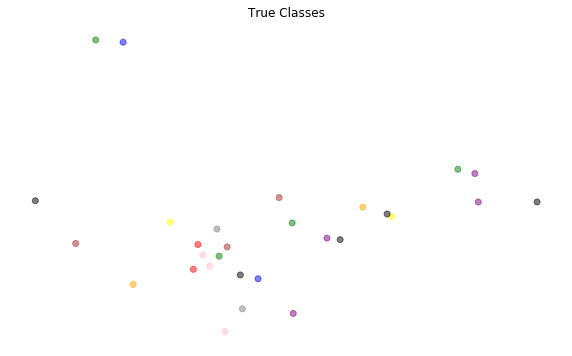

In [48]:
fig = plt.figure(figsize = (10,6))
ax = fig.add_subplot(111)
ax.set_frame_on(False)
ax.scatter(reduced_data[:, 0], reduced_data[:, 1], color = colors, alpha = 0.5, label = colors)
plt.xticks(())
plt.yticks(())
plt.title('True Classes')
plt.show()

Also plot the data with the features on top of that: we could also see that the communication words appear frequently and greatly influence the vector space of word features, for example, 'hmm','mhm','uh' are all in peripheral and distinguishable places, corresponding with several samples as well, which is not meaingful in temrs of the topic we hope to cluster. 

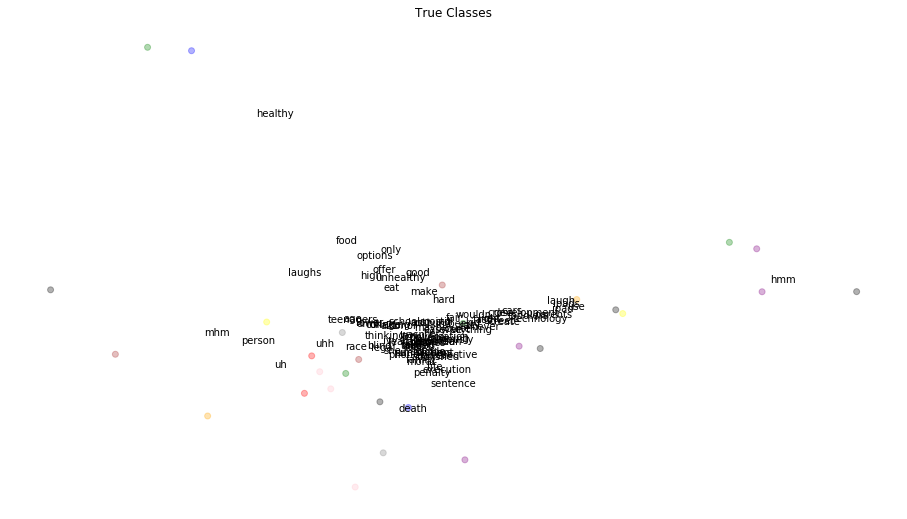

In [49]:
fig = plt.figure(figsize = (16,9))
ax = fig.add_subplot(111)
ax.set_frame_on(False)
ax.scatter(reduced_data[:, 0], reduced_data[:, 1], color = colors, alpha = 0.3, label = colors)
for i, word in enumerate(words):
    ax.annotate(word, (x[i],y[i]))
plt.xticks(())
plt.yticks(())
plt.title('True Classes')
plt.show()

Also, let's try to visualize the true class with 'condition' label in the biplot:

In [82]:
colordict_c = {
'TYB': 'red','NB': 'orange'
    }
colors = [colordict_c[str(c)] for c in df_con2['condition']]
print("The categories' colors are:\n{}".format(colordict_c.items()))

The categories' colors are:
dict_items([('TYB', 'red'), ('NB', 'orange')])


As we could see below, the above red dots are in TYB condition, while the below yellow dots are in NB conditon. They are generally separable between conditons, which is kind of interesting.

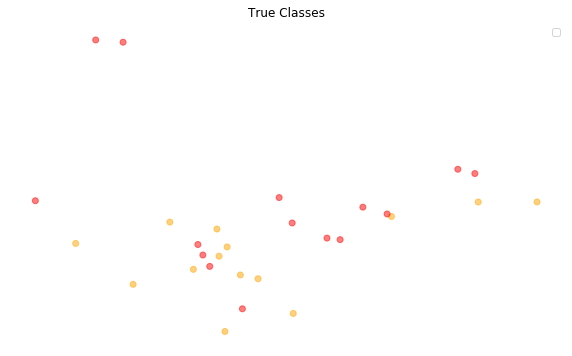

In [88]:
fig = plt.figure(figsize = (10,6))
ax = fig.add_subplot(111)
ax.set_frame_on(False)
ax.scatter(reduced_data[:, 0], reduced_data[:, 1], color = colors, alpha = 0.5, label = colors)
plt.xticks(())
plt.yticks(())
plt.legend(())
plt.title('True Classes')
plt.show()

Now visulization for predicted clusters:

In [50]:
colordict2 = {
'1': 'red','2': 'orange','3': 'green',
'4': 'blue','5': 'yellow','6': 'purple','7': 'black',
'8': 'gray','9': 'pink','10': 'brown',
    }
colors_p = [colordict2[str(l+1)] for l in km.labels_]

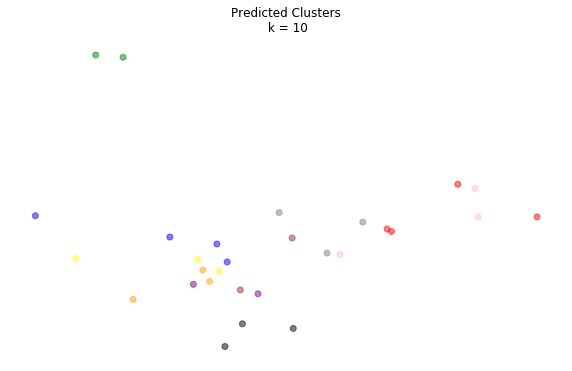

In [51]:
fig = plt.figure(figsize = (10,6))
ax = fig.add_subplot(111)
ax.set_frame_on(False)
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], color = colors_p, alpha = 0.5)
plt.xticks(())
plt.yticks(())
plt.title('Predicted Clusters\n k = 10')
plt.show()

As we could see above, the predicted 10 clusters are also very scattered and relatively 'centering around' for each cluster, which is reasonable, considering how few sample we have for clustering.

# Selecting Cluster Number

We can select an optimal cluster number by identifying the lowest of the metrics listed above (e.g., V-measure), but often you don't have "ground truth" or labeled data. For identifying the "best" number of clusters in an unsupervised way, we demonstrate the Silhouette method. Many other methods also exist (e.g., Bayesian Information Criteria or BIC, the visual "elbow criteria", etc.)

First we will define a helper function:

In [52]:
def plotSilhouette(n_clusters, X):
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize = (15,5))
    
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])
    clusterer = sklearn.cluster.KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)
    
    silhouette_avg = sklearn.metrics.silhouette_score(X, cluster_labels)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = sklearn.metrics.silhouette_samples(X, cluster_labels)

    y_lower = 10
    
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        cmap = matplotlib.cm.get_cmap("nipy_spectral")
        color = cmap(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        y_lower = y_upper + 10
    
    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    cmap = matplotlib.cm.get_cmap("nipy_spectral")
    colors = cmap(float(i) / n_clusters)
    ax2.scatter(reduced_data[:, 0], reduced_data[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors)

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    projected_centers = pca.transform(centers)
    # Draw white circles at cluster centers
    ax2.scatter(projected_centers[:, 0], projected_centers[:, 1],
                marker='o', c="white", alpha=1, s=200)

    for i, c in enumerate(projected_centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50)

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("PC 1")
    ax2.set_ylabel("PC 2")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')
    plt.show()
    print("For n_clusters = {}, The average silhouette_score is : {:.3f}".format(n_clusters, silhouette_avg))

Now we can examine a few different numbers of clusters: for example, let's start with 3 clusters.

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


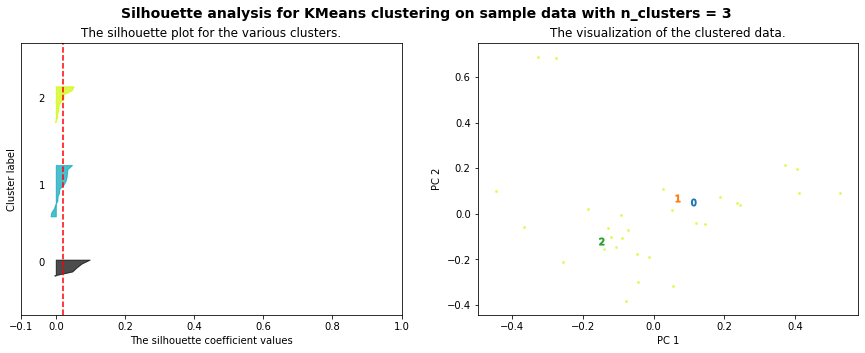

For n_clusters = 3, The average silhouette_score is : 0.022


In [72]:
X = conTFVects.toarray()
plotSilhouette(3, X)

As we could see, for 3 clusters, the silouette_score is really small; with 5 clusters, the score turns a little better:

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


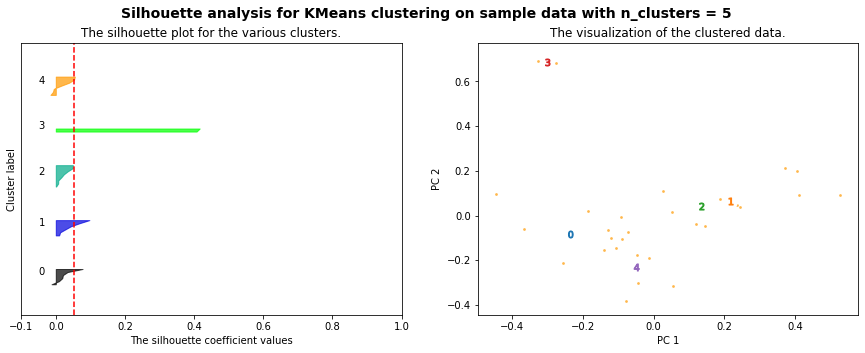

For n_clusters = 5, The average silhouette_score is : 0.053


In [54]:
X = conTFVects.toarray()
plotSilhouette(5, X)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


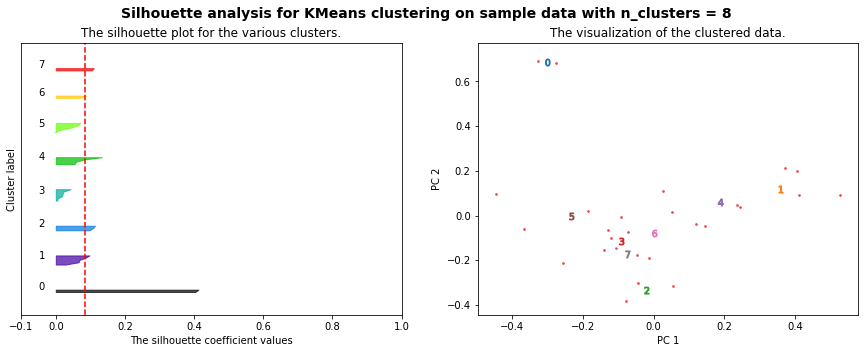

For n_clusters = 8, The average silhouette_score is : 0.086


In [56]:
X = conTFVects.toarray()
plotSilhouette(8, X)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


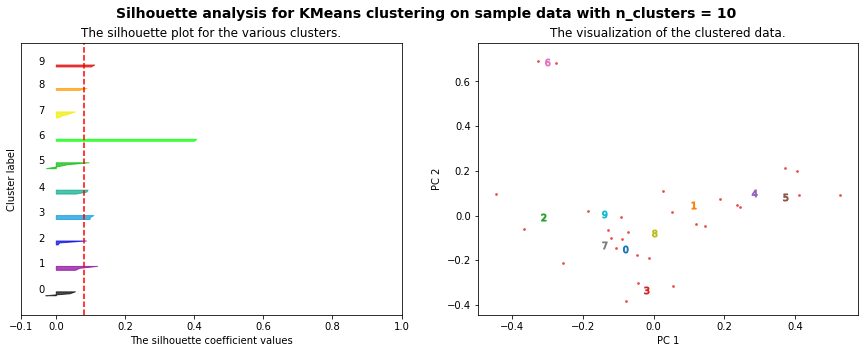

For n_clusters = 10, The average silhouette_score is : 0.081


In [57]:
X = conTFVects.toarray()
plotSilhouette(10, X)

With 8 and 10, the silouetter score turns much better, and is highest with 8 clusters, which means for the original 10 clusters, some of them could be clustered together. However, consdiering the word features we have, a combination of semantic meaninful words and communication words, the clusters might also include some distinctive expression patterns as well, except for topics in the corpora.

## <span style="color:red">*Exercise 2*</span>

<span style="color:red">Construct cells immediately below this that hierarchically cluster your documents using two approaches, and visualize them with a tree. Interrogate the recursive cluster contents in terms of both documents and closenesses. What does this nested cluster structure reveal about the organization of documents in your sampled corpora? Moreover, if they do worse than kmeans (as above), why do you think this is the case (hint: using metrics if you have ground truth or silhouette if you do not)? 

<span style="color:red">***Stretch***: Attempt using different distances into your clustering algorithms. (How) do they change the arrangement of clusters?

# Hierarchical Clustering with Wald's Method

Next we approach a hierchical clustering method, which proposes nested clusters at any resolution (at the finest resolution, every document is its own cluster).

Here we must begin by calculating how similar the documents are to one another.

As a first pass, we take our matrix of word counts per document
`conTFVects` and create a word occurrence matrix measuring how similar
the documents are to each other based on their number of shared words. (Note one could perform the converse operation, a document occurrence matrix measuring how similar  words are to each other based on their number of collocated documents).

In [59]:
conTFVects

<29x626 sparse matrix of type '<class 'numpy.float64'>'
	with 2540 stored elements in Compressed Sparse Row format>

In [60]:
conTFVects[:100].todense()

matrix([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.08379252, 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.        , 0.        , 0.        , ..., 0.        , 0.10224328,
         0.        ],
        [0.08103761, 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.05242954, 0.04537845, 0.        , ..., 0.        , 0.        ,
         0.        ]])

Build the word-coocurrence matrix: 

In [61]:
conCoocMat = conTFVects * conTFVects.T
#set the diagonal to 0 since we don't care how similar texts are to themselves
conCoocMat.setdiag(0)
#Another way of relating the texts is with their cosine similarity
#newsgroupsCosinMat1 = 1 - sklearn.metrics.pairwise.cosine_similarity(newsgroupsTFVects)
#But generally word occurrence is more accurate

Now we can compute a tree of nested clusters:

In [64]:
linkage_matrix = scipy.cluster.hierarchy.ward(conCoocMat.toarray())
linkage_matrix[:10]

C:\Users\zhuangchu\Anaconda3\lib\site-packages\scipy\cluster\hierarchy.py:830: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  return linkage(y, method='ward', metric='euclidean')


array([[ 8.        , 17.        ,  0.31380743,  2.        ],
       [ 7.        , 27.        ,  0.31495028,  2.        ],
       [16.        , 25.        ,  0.34606883,  2.        ],
       [ 4.        , 30.        ,  0.34656313,  3.        ],
       [20.        , 29.        ,  0.35332392,  3.        ],
       [ 1.        , 14.        ,  0.36710432,  2.        ],
       [12.        , 19.        ,  0.37187592,  2.        ],
       [ 5.        , 11.        ,  0.39137167,  2.        ],
       [ 2.        , 35.        ,  0.4015174 ,  3.        ],
       [32.        , 34.        ,  0.41780782,  5.        ]])


Now we can visualize the tree

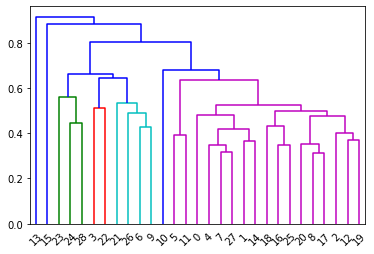

In [65]:
dendDat = scipy.cluster.hierarchy.dendrogram(linkage_matrix, get_leaves=True)

Interrogate the wald hierarchical finding with topic and condition information: I found that for most topics, they are scattered in the tree, only for topic 11 (death penalty), the corpora are more closely clustered together (0,1,27, but still a little bit far away).

However, what is really interesting is most corpora in TYB condition are clustered together in the left 'blue' branch (8/11 are in TYB condition), while more corpora in NB condition are clustered in the right 'purple' brandh (11/17 are in NB condition).

Therefore we might infer that linguistic expressions are kind of different between conditions. The influence of features from these two conditions is inneglectable. I am also wondering how we could better extract those features and expression patterns to more clearly separate the two conditions. Actually will these features are irrelavant with topics related features? 

In [66]:
df_con2[['condition','topic','conversation_txt']]

,condition,topic,conversation_txt
0,NB,11,"Okay, so uh, I guess they said we should start..."
1,TYB,11,"So I don't really I think I said--yes, everyon..."
2,NB,2,"So I, when I read this question I thought abou..."
3,TYB,2,Okay so you--What's your opinion on this? I st...
4,TYB,5,Experimenter 0:00 This is this is group num...
5,NB,7,"Yea, so so so. What do you--what do you person..."
6,NB,7,"Okay, um, so I put a four, I like very minorly..."
7,TYB,1,Unknown Speaker 0:01 [inaudible] Um OK--I s...
8,NB,1,"Oh, okay, um, so I felt like uh--I feel like I..."
9,TYB,9,So I disagree with this because um I think ne...


Another approach involves cutting the tree into `n` branches. We can do this with [`fcluster()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.fcluster.html#scipy.cluster.hierarchy.fcluster). Lets break the tree into 10 clusters. When we do this with all of the data in the dataframe, as below, we can add those clusters back for detailed evaluation.


In [73]:
hierarchicalClusters = scipy.cluster.hierarchy.fcluster(linkage_matrix, 10, 'maxclust')
hierarchicalClusters

array([ 7,  7,  7,  3,  7,  6,  4,  7,  7,  4,  8,  6,  7, 10,  7,  9,  7,
        7,  7,  7,  7,  5,  3,  2,  1,  7,  4,  7,  1], dtype=int32)

In [75]:
linkage_matrix_full = scipy.cluster.hierarchy.ward(conCoocMat.toarray())
hierarchicalClusters_full = scipy.cluster.hierarchy.fcluster(linkage_matrix_full, 4, 'maxclust')
print("For our complete clusters:")
print("Homogeneity: {:0.3f}".format(sklearn.metrics.homogeneity_score(df_con2['topic'], hierarchicalClusters_full)))
print("Completeness: {:0.3f}".format(sklearn.metrics.completeness_score(df_con2['topic'], hierarchicalClusters_full)))
print("V-measure: {:0.3f}".format(sklearn.metrics.v_measure_score(df_con2['topic'], hierarchicalClusters_full)))
print("Adjusted Rand Score: {:0.3f}".format(sklearn.metrics.adjusted_rand_score(df_con2['topic'], hierarchicalClusters_full)))

C:\Users\zhuangchu\Anaconda3\lib\site-packages\scipy\cluster\hierarchy.py:830: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  return linkage(y, method='ward', metric='euclidean')


For our complete clusters:
Homogeneity: 0.154
Completeness: 0.387
V-measure: 0.220
Adjusted Rand Score: -0.014


Not suprising, Wald Hierarchical clustering does not perform well for the 10 topic clustering, even worse below the chance.Especially for Homegeneity, the Wald hiearchical clustering does not perform well that it tends to group corpora from differernt topics into one category. 

How about trying to cut the corpora into 2 branches, and test with 'condition' labeling?

In [76]:
hierarchicalClusters = scipy.cluster.hierarchy.fcluster(linkage_matrix, 2, 'maxclust')
hierarchicalClusters

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1], dtype=int32)

As we could see above from the returned label, it is not very ideal, almost all corpora was assigned with label 1, only 1 with 2. Wald hierchial clustering does not suit well in our dataset with so many confounding information.

In [77]:
linkage_matrix_full = scipy.cluster.hierarchy.ward(conCoocMat.toarray())
hierarchicalClusters_full = scipy.cluster.hierarchy.fcluster(linkage_matrix_full, 4, 'maxclust')
print("For our complete clusters:")
print("Homogeneity: {:0.3f}".format(sklearn.metrics.homogeneity_score(df_con2['condition'], hierarchicalClusters_full)))
print("Completeness: {:0.3f}".format(sklearn.metrics.completeness_score(df_con2['condition'], hierarchicalClusters_full)))
print("V-measure: {:0.3f}".format(sklearn.metrics.v_measure_score(df_con2['condition'], hierarchicalClusters_full)))
print("Adjusted Rand Score: {:0.3f}".format(sklearn.metrics.adjusted_rand_score(df_con2['condition'], hierarchicalClusters_full)))

C:\Users\zhuangchu\Anaconda3\lib\site-packages\scipy\cluster\hierarchy.py:830: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  return linkage(y, method='ward', metric='euclidean')


For our complete clusters:
Homogeneity: 0.116
Completeness: 0.090
V-measure: 0.101
Adjusted Rand Score: 0.027


## <span style="color:red">*Exercise 3*</span>

<span style="color:red">Construct cells immediately below this that topic model documents related to your anticipated final project. Interrogate and visually plot (e.g., as a bar graph?) the topic-word loadings and the document-topic loadings. What does this topic structure reveal about the distribution of contents across your documents? Systematically vary the $\alpha$, $\eta$, and topic number of the model for your text and describe in detail whether and how these changes led to distinctive outcomes, visible to you as analyst.  

<span style="color:red">**Stretch**: Cluster your documents, but instead of using words alone, use their topic loadings as an additional set of features. Do these topic loadings increase the apparent semantic coherence of your clusters?</span> 

# Gensim

To do topic modeling we will also be using data from the [grimmer press releases corpus](ttps://github.com/lintool/GrimmerSenatePressReleases). To use the texts with gensim we need to create a `corpua` object, this takes a few steps. First we create a `Dictionary` that maps tokens to ids.

In [94]:
#normalization function interested for our corpora, not excluding 'I', 'You' and other stopwords
import spacy
nlp = spacy.load("en")
stop_words_freq=['that','this','the','it','a','to',"'s",'of',"n't",'is','be']

#function for normalization, filtering as we want 
def normalizeTokens2(word_list, extra_stop=stop_words_freq):
    #We can use a generator here as we just need to iterate over it
    normalized = []
    if type(word_list) == list and len(word_list) == 1:
        word_list = word_list[0]

    if type(word_list) == list:
        word_list = ' '.join([str(elem) for elem in word_list]) 

    doc = nlp(word_list.lower())
    
    # add the property of stop word to words considered as stop words
    if len(extra_stop) > 0:
        for stopword in extra_stop:
            lexeme = nlp.vocab[stopword]
            lexeme.is_stop = True

    for w in doc:
        #print(w,w.text,w.lemma_)
        # if it's not a stop word or punctuation mark, add it to our article
        if w.text != '\n' and not w.is_punct and not w.like_num and len(w.text.strip()) > 0:
            # we add the lematized version of the word
            if w.text not in stop_words_freq:
                if w.lemma_!='-PRON-':
                    normalized.append(str(w.lemma_))
                else:
                    normalized.append(str(w.text))

    return normalized

In [95]:
#preprocessing our data
df_con2['tokenized_text_all'] = df_con2['conversation_txt'].apply(lambda x: lucem_illud_2020.word_tokenize(x))
df_con2['normalized_token_all'] = df_con2['tokenized_text_all'].apply(lambda x: normalizeTokens2(x))
#also try with the basic normalization functions which will filter out all those stopwords
df_con2['normalized_token_all2'] = df_con2['tokenized_text_all'].apply(lambda x: lucem_illud_2020.normalizeTokens(x))

In [99]:
#also applying TF-IDF filtering to the corpora
def dropMissing(wordLst, vocab):
    return [w for w in wordLst if w in vocab]

#not filtering 'I', 'You'
df_con2['reduced_tokens_all'] =df_con2['normalized_token_all'].apply(lambda x: dropMissing(x, conTFVectorizer.vocabulary_.keys()))

#filtering 'I','You' and other stopwords
df_con2['reduced_tokens_all2'] =df_con2['normalized_token_all2'].apply(lambda x: dropMissing(x, conTFVectorizer.vocabulary_.keys()))


Then for each of the texts we create a list of tuples containing each token and its count. We will only use the first half of our dataset for now and will save the remainder for testing.

In [100]:
dictionary = gensim.corpora.Dictionary(df_con2['reduced_tokens_all'])
corpus = [dictionary.doc2bow(text) for text in df_con2['reduced_tokens_all']]

dictionary2 = gensim.corpora.Dictionary(df_con2['reduced_tokens_all2'])
corpus2 = [dictionary2.doc2bow(text) for text in df_con2['reduced_tokens_all2']]

Then we serialize the corpus as a file and load it. This is an important step when the corpus is large.

In [101]:
gensim.corpora.MmCorpus.serialize('con_corpora.mm', corpus)
conmm = gensim.corpora.MmCorpus('con_corpora.mm')

In [102]:
gensim.corpora.MmCorpus.serialize('con_corpora2.mm', corpus2)
conmm2 = gensim.corpora.MmCorpus('con_corpora2.mm')

Now we have a correctly formatted corpus that we can use for topic modeling and induction.
And then we build the topic models: with the most default parameters (not filtering 'I' 'You', 10 topics, auto alpha and eta)

In [123]:
conlda = gensim.models.ldamodel.LdaModel(corpus=conmm, id2word=dictionary, num_topics=10, alpha='auto', eta='auto')

We can now see how our model predicts the topic of each conversation and make this into a `dataFrame` for later analysis

In [104]:
ldaDF = pandas.DataFrame({
        'name' : df_con2['topic'],  #change the name to the topic num
        'topics' : [conlda[dictionary.doc2bow(l)] for l in df_con2['reduced_tokens_all']]
    })

In [178]:
#fit the predicted probability into separate columns in a dataframe
#Dict to temporally hold the probabilities
topicsProbDict = {i : [0] * len(ldaDF) for i in range(conlda.num_topics)}

#Load them into the dict
for index, topicTuples in enumerate(ldaDF['topics']):
    for topicNum, prob in topicTuples:
        topicsProbDict[topicNum][index] = prob

#Update the DataFrame
for topicNum in range(conlda.num_topics):
    ldaDF['topic_{}'.format(topicNum)] = topicsProbDict[topicNum]

In [107]:
ldaDF.head()

,name,topics,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9
0,11,"[(0, 0.11214415), (2, 0.16760561), (8, 0.25419...",0.112144,0.000000,0.167606,0.000000,0.0,0.0,0.000000,0.0,0.254196,0.460526
1,11,"[(3, 0.987652)]",0.000000,0.000000,0.000000,0.987652,0.0,0.0,0.000000,0.0,0.000000,0.000000
2,2,"[(8, 0.99163574)]",0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.991636,0.000000
3,2,"[(3, 0.85386103), (9, 0.13684922)]",0.000000,0.000000,0.000000,0.853861,0.0,0.0,0.000000,0.0,0.000000,0.136849
4,5,"[(0, 0.053644203), (1, 0.19142152), (3, 0.1997...",0.053644,0.191422,0.000000,0.199741,0.0,0.0,0.534627,0.0,0.015589,0.000000


Now let's visualize this for several (e.g.15) documents in the corpus. First we'll subset the data:

In [111]:
ldaDFV = ldaDF[:15][['topic_%d' %x for x in range(10)]]
ldaDFVisN = ldaDF[:15][['name']]
ldaDFVis = ldaDFV.as_matrix(columns=None)
ldaDFVisNames = ldaDFVisN.as_matrix(columns=None)
ldaDFV

,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9
0,0.112144,0.000000,0.167606,0.000000,0.00000,0.0,0.000000,0.000000,0.254196,0.460526
1,0.000000,0.000000,0.000000,0.987652,0.00000,0.0,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.00000,0.0,0.000000,0.000000,0.991636,0.000000
3,0.000000,0.000000,0.000000,0.853861,0.00000,0.0,0.000000,0.000000,0.000000,0.136849
4,0.053644,0.191422,0.000000,0.199741,0.00000,0.0,0.534627,0.000000,0.015589,0.000000
5,0.000000,0.000000,0.000000,0.000000,0.98935,0.0,0.000000,0.000000,0.000000,0.000000
6,0.000000,0.989389,0.000000,0.000000,0.00000,0.0,0.000000,0.000000,0.000000,0.000000
7,0.000000,0.000000,0.000000,0.990073,0.00000,0.0,0.000000,0.000000,0.000000,0.000000
8,0.000000,0.991746,0.000000,0.000000,0.00000,0.0,0.000000,0.000000,0.000000,0.000000
9,0.000000,0.000000,0.989595,0.000000,0.00000,0.0,0.000000,0.000000,0.000000,0.000000


First we can visualize as a stacked bar chart:

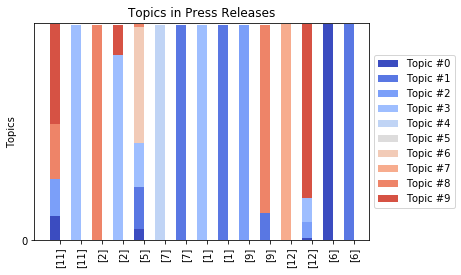

In [112]:
N = 15
ind = np.arange(N)
K = conlda.num_topics  # N documents, K topics
ind = np.arange(N)  # the x-axis locations for the novels
width = 0.5  # the width of the bars
plots = []
height_cumulative = np.zeros(N)

for k in range(K):
    color = plt.cm.coolwarm(k/K, 1)
    if k == 0:
        p = plt.bar(ind, ldaDFVis[:, k], width, color=color)
    else:
        p = plt.bar(ind, ldaDFVis[:, k], width, bottom=height_cumulative, color=color)
    height_cumulative += ldaDFVis[:, k]
    plots.append(p)
    

plt.ylim((0, 1))  # proportions sum to 1, so the height of the stacked bars is 1
plt.ylabel('Topics')

plt.title('Topics in Press Releases')
plt.xticks(ind+width/2, ldaDFVisNames, rotation='vertical')

plt.yticks(np.arange(0, 1, 10))
topic_labels = ['Topic #{}'.format(k) for k in range(K)]
plt.legend([p[0] for p in plots], topic_labels, loc='center left', frameon=True,  bbox_to_anchor = (1, .5))

plt.show()

We can also visualize as a heat map: from the above bar graph and below heat, we could see that the 10 topic modeled does not correspond well with the original topics; while same topic are modeled as close ones but still different topics. (e.g. for corpora with original topic 11, they are differently labeled as topic 9 or 3). FOr the default topic model, the results are less interesting.

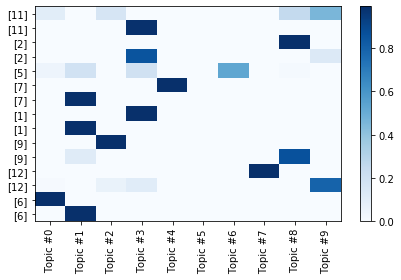

In [113]:
plt.pcolor(ldaDFVis, norm=None, cmap='Blues')
plt.yticks(np.arange(ldaDFVis.shape[0])+0.5, ldaDFVisNames);
plt.xticks(np.arange(ldaDFVis.shape[1])+0.5, topic_labels);

# flip the y-axis so the texts are in the order we anticipate (Austen first, then Brontë)
plt.gca().invert_yaxis()

# rotate the ticks on the x-axis
plt.xticks(rotation=90)

# add a legend
plt.colorbar(cmap='Blues')
plt.tight_layout()  # fixes margins
plt.show()

We can also look at the top words from each topic to get a sense of the semantic (or syntactic) domain they represent. To look at the terms with the highest LDA weight we can do the following: 

From the below key words related with each topic, we could also found that each original topic are separated into different topics labeled (e.g. ipad, parent are both in topic 2/6, care is in both topic 9/5/3). The performance of the default model is very unpromising.

In [115]:
topicsDict = {}
for topicNum in range(conlda.num_topics):
    topicWords = [w for w, p in conlda.show_topic(topicNum)]
    topicsDict['Topic_{}'.format(topicNum)] = topicWords

wordRanksDF = pandas.DataFrame(topicsDict)
wordRanksDF

,Topic_0,Topic_1,Topic_2,Topic_3,Topic_4,Topic_5,Topic_6,Topic_7,Topic_8,Topic_9
0,healthy,laugh,ipad,laugh,drink,healthy,use,person,uh,go
1,laugh,use,never,go,go,laugh,hmm,mhm,uhh,car
2,make,way,become,umm,family,only,ipad,make,person,come
3,food,uh,laugh,school,umm,food,parent,hmm,umm,someone
4,good,go,work,yea,me,option,toddler,laugh,go,may
5,option,look,come,car,still,good,technology,school,laugh,perspective
6,point,phone,uh,cross,time,car,go,test,me,cross
7,hmm,person,kid,time,school,eat,up,race,mhm,fast
8,may,conversation,parent,uh,alcohol,point,may,good,car,time
9,go,make,still,maybe,us,cross,out,look,case,life


We can see that several of the topics have the same top words, but there are definitely differences. We can try and make the topics more distinct by changing the 
𝛼
α
and 
𝜂
η
parameters of the model. 
𝛼
α
controls the sparsity of document-topic loadings, and 
𝜂
η
controls the sparsity of topic-word loadings.
We can make a visualization of the distribution of words over any single topic.

<Figure size 432x288 with 0 Axes>

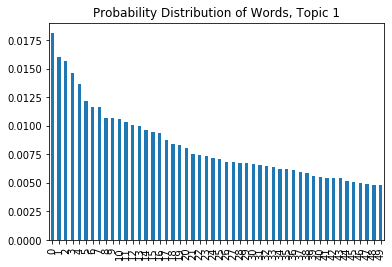

In [116]:
topic1_df = pandas.DataFrame(conlda.show_topic(1, topn=50))
plt.figure()
topic1_df.plot.bar(legend = False)
plt.title('Probability Distribution of Words, Topic 1')
plt.show()

See how different $\eta$ values can change the shape of the distribution.

In [118]:
conldaa1 = gensim.models.ldamodel.LdaModel(corpus=conmm, id2word=dictionary, num_topics=10, eta = 0.00001)
conldaa2 = gensim.models.ldamodel.LdaModel(corpus=conmm, id2word=dictionary, num_topics=10, eta = 0.9)

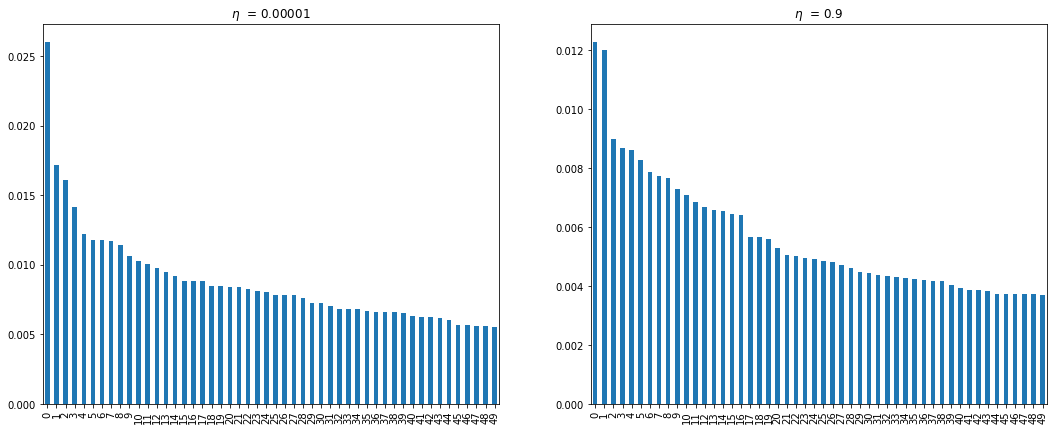

In [119]:
topic11_df = pandas.DataFrame(conldaa1.show_topic(1, topn=50))
topic21_df = pandas.DataFrame(conldaa2.show_topic(1, topn=50))

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(18, 7)
topic11_df.plot.bar(legend = False, ax = ax1, title = '$\eta$  = 0.00001')
topic21_df.plot.bar(legend = False, ax = ax2, title = '$\eta$  = 0.9')
plt.show()

Then after further tuning the topic modeling parameters, I found that for eta=0.9, with 5 topic modeled, corpora with no-stop words filtered, the model generates generally better results (while with each run, the results are also slightly different): 

In [280]:
conlda = gensim.models.ldamodel.LdaModel(corpus=conmm, id2word=dictionary, num_topics=5, alpha='auto', eta=0.9)

We can now see how our model predicts the topic of each conversation and make this into a `dataFrame` for later analysis

In [281]:
ldaDF = pandas.DataFrame({
        'name' : df_con2['topic'],  #change the name to the topic num
        'topics' : [conlda[dictionary.doc2bow(l)] for l in df_con2['reduced_tokens_all']]
    })

In [282]:
#fit the predicted probability into separate columns in a dataframe
#Dict to temporally hold the probabilities
topicsProbDict = {i : [0] * len(ldaDF) for i in range(conlda.num_topics)}

#Load them into the dict
for index, topicTuples in enumerate(ldaDF['topics']):
    for topicNum, prob in topicTuples:
        topicsProbDict[topicNum][index] = prob

#Update the DataFrame
for topicNum in range(conlda.num_topics):
    ldaDF['topic_{}'.format(topicNum)] = topicsProbDict[topicNum]

In [283]:
ldaDF.head()

,name,topics,topic_0,topic_1,topic_2,topic_3,topic_4
0,11,"[(0, 0.49122444), (4, 0.5011343)]",0.491224,0.000000,0.0,0.0,0.501134
1,11,"[(0, 0.94811964), (4, 0.04027543)]",0.948120,0.000000,0.0,0.0,0.040275
2,2,"[(0, 0.98950857)]",0.989509,0.000000,0.0,0.0,0.000000
3,2,"[(0, 0.104813464), (1, 0.031863026), (4, 0.856...",0.104813,0.031863,0.0,0.0,0.856669
4,5,"[(0, 0.19569932), (1, 0.7945701)]",0.195699,0.794570,0.0,0.0,0.000000


Now let's visualize this for several (e.g.15) documents in the corpus. First we'll subset the data:

In [284]:
ldaDFV = ldaDF[:15][['topic_%d' %x for x in range(5)]]
ldaDFVisN = ldaDF[:15][['name']]
ldaDFVis = ldaDFV.as_matrix(columns=None)
ldaDFVisNames = ldaDFVisN.as_matrix(columns=None)
ldaDFV

,topic_0,topic_1,topic_2,topic_3,topic_4
0,0.491224,0.000000,0.000000,0.000000,0.501134
1,0.948120,0.000000,0.000000,0.000000,0.040275
2,0.989509,0.000000,0.000000,0.000000,0.000000
3,0.104813,0.031863,0.000000,0.000000,0.856669
4,0.195699,0.794570,0.000000,0.000000,0.000000
5,0.000000,0.020977,0.000000,0.192653,0.779165
6,0.985054,0.000000,0.000000,0.000000,0.000000
7,0.000000,0.000000,0.000000,0.987567,0.000000
8,0.000000,0.000000,0.000000,0.000000,0.989418
9,0.218110,0.000000,0.000000,0.772626,0.000000


First we can visualize as a stacked bar chart:

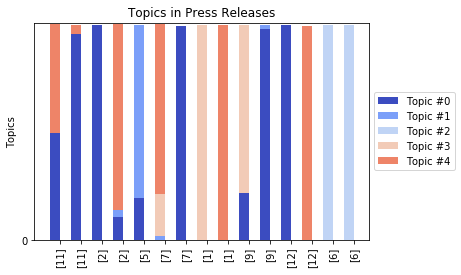

In [285]:
N = 15
ind = np.arange(N)
K = conlda.num_topics  # N documents, K topics
ind = np.arange(N)  # the x-axis locations for the novels
width = 0.5  # the width of the bars
plots = []
height_cumulative = np.zeros(N)

for k in range(K):
    color = plt.cm.coolwarm(k/K, 1)
    if k == 0:
        p = plt.bar(ind, ldaDFVis[:, k], width, color=color)
    else:
        p = plt.bar(ind, ldaDFVis[:, k], width, bottom=height_cumulative, color=color)
    height_cumulative += ldaDFVis[:, k]
    plots.append(p)
    

plt.ylim((0, 1))  # proportions sum to 1, so the height of the stacked bars is 1
plt.ylabel('Topics')

plt.title('Topics in Press Releases')
plt.xticks(ind+width/2, ldaDFVisNames, rotation='vertical')

plt.yticks(np.arange(0, 1, 10))
topic_labels = ['Topic #{}'.format(k) for k in range(K)]
plt.legend([p[0] for p in plots], topic_labels, loc='center left', frameon=True,  bbox_to_anchor = (1, .5))

plt.show()

From the bar graph and heatmap, we could see that, this model generally predict a little better result, fore example for original topic 11, both corpora are labeled as topic 0; for original topic 6, both are labeled as topic 2; while there are still many cross labeld and miss labeld topic, the result is generally better than the default, but not very good as well.

Original topic 11 seems to have the best topic modeling results, the topic is 'The death penalty should be abolished in the U.S.', which have 5 corpora in this dataset, and also contain distinguishable words like 'death', 'sentence', which could make its topic prediction more reliable. Also for topic 6, 'Parents should never use iPads as toys for their toddlers.', there more distinguishable words like 'parents/toddlers/ipad' which could help generate more reliable topic modeling results.

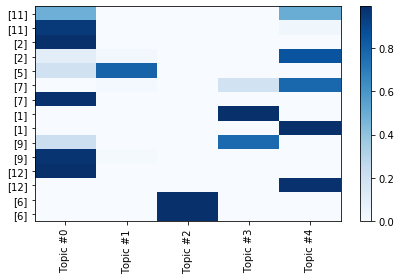

In [286]:
plt.pcolor(ldaDFVis, norm=None, cmap='Blues')
plt.yticks(np.arange(ldaDFVis.shape[0])+0.5, ldaDFVisNames);
plt.xticks(np.arange(ldaDFVis.shape[1])+0.5, topic_labels);

# flip the y-axis so the texts are in the order we anticipate (Austen first, then Brontë)
plt.gca().invert_yaxis()

# rotate the ticks on the x-axis
plt.xticks(rotation=90)

# add a legend
plt.colorbar(cmap='Blues')
plt.tight_layout()  # fixes margins
plt.show()

We can also look at the top words from each topic to get a sense of the semantic (or syntactic) domain they represent. To look at the terms with the highest LDA weight we can do the following: 

From the below key words related with each topic, we could also found that many same words contribute to the model; also these words, like 'laugh', 'hmm', 'uh' are not really topic related, but general communication words. The tricky part for this analysis is the separation of those semantic meaningful words from the communication words. More possibly, because of the small sample size for each topic, the confounding factor of communication words is very hard to eliminate (even if try with higher df selection standard, and filtering stopwords, the contribution of communicaiton words still dominates).

In [287]:
topicsDict = {}
for topicNum in range(conlda.num_topics):
    topicWords = [w for w, p in conlda.show_topic(topicNum)]
    topicsDict['Topic_{}'.format(topicNum)] = topicWords

wordRanksDF = pandas.DataFrame(topicsDict)
wordRanksDF

,Topic_0,Topic_1,Topic_2,Topic_3,Topic_4
0,laugh,laugh,healthy,school,go
1,uh,go,person,umm,maybe
2,person,hmm,way,laugh,come
3,make,car,make,hmm,may
4,go,person,uh,ipad,put
5,point,time,up,make,time
6,good,age,laugh,way,car
7,hmm,me,school,family,start
8,may,use,good,person,uh
9,use,other,go,come,someone


## <span style="color:red">*Exercise 4*</span>

<span style="color:red">Construct cells immediately below this that use topic models and networks, or dynamic topic models on datasets relevant to your final project. You can also extend the analysis of the COHA or Soap datasets, if relevant to the comparison of data for your projects. (You could possibly use coha_genres dictionary to conduct analysis on topic evolution for a particular genre? What themes do you see evolving throughout these corpora?)

## Extending Topic Models within broader research pipelines

Topic models can be the base of more complex analysis. One good example is the paper - Individuals, institutions, and innovation in the debates of the French Revolution (https://www.pnas.org/content/115/18/4607), where they use topic models to find similarities and differences between the topics of different individuals. Let us revisit this idea using the Soap opera database. Who innovates and influences the most within the Soap?

The next few lines of code follows the same process as last weeks notebook. Please visit the old notebook to read descriptions of the code if you have forgotten what it does.

So for this part of analysis, we will try to calculate the distance between corpora according to the topic distribution assigned to them. However, considering the non-promising result of topic modeling with our dataset, the current distance result is just preliminary and for practice.

First of all, we organize the corpora into PersonA and PersonB format, and extract corpora for each speaker:

In [120]:
#extract corpora of each speaker and organize into one list/dataframe
A_cop=[]
A_con=[]
A_topic=[]
for index, row in df_con2.iterrows():
    A_cop.append(row['con_txt_A'])
    A_con.append(row['condition'])
    A_topic.append(row['topic'])
    #A_wordc.append(row['word_counts_A'])
    A_cop.append(row['con_txt_B'])
    A_con.append(row['condition'])
    A_topic.append(row['topic'])
    #A_wordc.append(row['word_counts_B'])

In [121]:
label=[]
for i in range(29):
    label.append('A_'+str(i+1))
    label.append('B_'+str(i+1))

In [272]:
df_AB=pd.DataFrame({'con_txt':A_cop,'condition':A_con,'label':label,'topic':A_topic})
df_AB.head()

,con_txt,condition,label,topic
0,"Okay, so uh, I guess they said we should start...",NB,A_1,11
1,"Yea, we should start Um, yeah. I actually didn...",NB,B_1,11
2,"So I don't really I think I said--yes, everyon...",TYB,A_2,11
3,I-I think put something that's below five.. Th...,TYB,B_2,11
4,"So I, when I read this question I thought abou...",NB,A_3,2


Corpora pre-processing, tokenization and normalization (not excluded stopwords we care about):

In [273]:
df_AB['tokenized_text'] = df_AB['con_txt'].apply(lambda x: lucem_illud_2020.word_tokenize(x))
df_AB['normalized_token'] = df_AB['tokenized_text'].apply(lambda x: normalizeTokens2(x))

Predict topic for each corpora based on the model generated in the last exercise:

In [288]:
df_AB['topic_predicted']=df_AB['normalized_token'].apply(lambda x: conlda[dictionary.doc2bow(x)])

From a first visulization, we could see that the topic predicted is very similar between pairs:

In [289]:
df_AB[['con_txt','condition','label','topic','topic_predicted']]

,con_txt,condition,label,topic,topic_predicted
0,"Okay, so uh, I guess they said we should start...",NB,A_1,11,"[(0, 0.55470294), (4, 0.43544048)]"
1,"Yea, we should start Um, yeah. I actually didn...",NB,B_1,11,"[(0, 0.043008417), (2, 0.010919523), (3, 0.011..."
2,"So I don't really I think I said--yes, everyon...",TYB,A_2,11,"[(0, 0.8056892), (4, 0.1732335)]"
3,I-I think put something that's below five.. Th...,TYB,B_2,11,"[(0, 0.9664789)]"
4,"So I, when I read this question I thought abou...",NB,A_3,2,"[(0, 0.9716318)]"
5,"So, uh I-I actually uh read a lot about this t...",NB,B_3,2,"[(0, 0.98362255)]"
6,Okay so you--What's your opinion on this? Oh w...,TYB,A_4,2,"[(0, 0.17767996), (4, 0.8016525)]"
7,I strongly disagree with this I think you shou...,TYB,B_4,2,"[(0, 0.026749888), (1, 0.05054085), (4, 0.9105..."
8,Experimenter 0:00 This is this is group num...,TYB,A_5,5,"[(0, 0.02080244), (1, 0.9640902)]"
9,I like what you said about like the right to. ...,TYB,B_5,5,"[(0, 0.6711024), (1, 0.30265293)]"


Then we further calculate the distance between agent/corpora based on their predicted topic distribution:

In [290]:
from gensim.matutils import kullback_leibler

def convert_to_prob(bow):
    ps = []
    for topic_no, topic_prob in bow:
        ps.append(topic_prob)
    return ps

Transform the predicted topic into full predicted topic distribution with all five topics: 

In [291]:
df_AB['topic_predicted0']=[[]]*len(df_AB)

for index, row in df_AB.iterrows():
    predicted=row['topic_predicted']
    predicted0=[[1,0],[2,0],[3,0],[4,0],[5,0]]
    for p0 in predicted:
        p0_id=p0[0]
        p0_value=p0[1]
        predicted0[p0_id-1][1]=p0_value
    df_AB['topic_predicted0'][index]=predicted0

C:\Users\zhuangchu\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


Calculate the distance (by KL distance) between two agent by their predicted topic distribution:

In [292]:
M=np.ones((len(df_AB),len(df_AB)))*5
L = []
import math
for agent1 in range(len(df_AB)):
    p = df_AB['topic_predicted0'][agent1]
    p = convert_to_prob(p)
    l = []
    for agent2 in range(len(df_AB)):
        q = df_AB['topic_predicted0'][agent2]
        q = convert_to_prob(q)
        divpq=kullback_leibler(p, q)
        l.append(kullback_leibler(p, q))
        if math.isinf(divpq):
            M[agent1,agent2]=5
        else:
            M[agent1,agent2]=kullback_leibler(p, q)
    L.append(l)
#M = np.array(L)

Visualize the distance measures between pairs:

from the visualizaiton we could see that except for some corpora and pairs, the distance between each other generally have very large distance, indicating very different topic distributions.

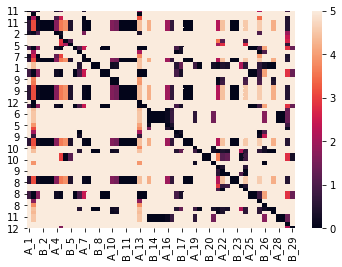

In [300]:
fig = plt.figure()
div = pandas.DataFrame(M, columns = list(df_AB['label']), index = list(df_AB['topic']))
ax = sns.heatmap(div)
plt.show()

Then we further calculate the divergence score based on pairs:

In [301]:
#pair similarity
sim_pair_TYB,sim_pair_NB=[],[]
for i in range(12):
    if df_AB['condition'][2*i]=='TYB':
        sim_pair_TYB.append(float(M[2*i,2*i+1]))
    if df_AB['condition'][2*i]=='NB':
        sim_pair_NB.append(float(M[2*i,2*i+1]))    

In [302]:
avg_sim_pair_TYB=sum(sim_pair_TYB)/len(sim_pair_TYB)
avg_sim_pair_NB=sum(sim_pair_NB)/len(sim_pair_NB)
print('Avg divergence of pair in TYB',round(avg_sim_pair_TYB,4))
print('Avg divergence of pair in NB',round(avg_sim_pair_NB,4))

Avg divergence of pair in TYB 1.0503
Avg divergence of pair in NB 1.1775


In [303]:
#averaged distance across all agents
print('Avg divergence of each two agent:',round(np.mean(M),4))

Avg divergence of each two agent: 4.0564


As we could see from the results above, pairs generally have much smaller distance between each other accoridng to their topic (about 1) compared with distance between each two random agent (about 4); also for TYB conditon, the distance between agents of topic distribution is much smaller, compared with NB, which is very interesting and in line with our prediciton of this study. In 'Thank you Because' condition, two speakers are more possible to touch common ground.